In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

!pip install sklearn-hierarchical-classification
from sklearn_hierarchical_classification.classifier import HierarchicalClassifier
from sklearn_hierarchical_classification.constants import ROOT

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd /content/drive/MyDrive/UFF/TCC/Implementação/

/content/drive/MyDrive/UFF/TCC/Implementação


In [8]:
df = pd.read_csv('dataset.csv')

activities_labels = ['STANDING', 'LAYING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
transitions_labels = ['SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_SIT', 'SIT_TO_STAND']

# Filter
df = df.loc[~df['Activity'].isin(['LIE_TO_STAND', 'STAND_TO_LIE'])]

X = df.drop(columns=['Activity'])
y = df['Activity']

metrics = ['f1_weighted', 'balanced_accuracy', 'accuracy']

## KNN removing some PT

In [9]:

class_hierarchy = {
    ROOT: ["T", "NT"],
    "NT": activities_labels,
    "T": transitions_labels
}

base_estimator = {
    ROOT: SVC(C=100, kernel='rbf', probability=True, random_state=42),
    "NT": MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(400,),
                    random_state=42),
    "T": KNeighborsClassifier(n_neighbors=7, n_jobs=-1),
}

clf = HierarchicalClassifier(
    base_estimator=base_estimator,
    class_hierarchy=class_hierarchy,
    prediction_depth='mlnp',
    algorithm='lcpn',
)

In [10]:
result = cross_validate(clf, X, y, cv=10, scoring=metrics,
                        return_train_score=True, n_jobs=-1)

print("\tf1:")
print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
    .format(mean = result.get('test_f1_weighted').mean()*100,
            std = result.get('test_f1_weighted').std()))

print("\tbalanced accuracy:")
print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
    .format(mean = result.get('test_balanced_accuracy').mean()*100,
            std = result.get('test_balanced_accuracy').std()))

print("\taccuracy:")
print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
      .format(mean = result.get('test_accuracy').mean()*100,
              std = result.get('test_accuracy').std()))

	f1:
		mean = 95.46%;
		std = 0.03;
	balanced accuracy:
		mean = 94.44%;
		std = 0.03;
	accuracy:
		mean = 95.49%;
		std = 0.03;


In [ ]:
result = cross_validate(clf, X, y, cv=10, scoring=metrics,
                        return_train_score=True, n_jobs=-1)

print("\tf1:")
print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
    .format(mean = result.get('test_f1_weighted').mean()*100,
            std = result.get('test_f1_weighted').std()))

print("\tbalanced accuracy:")
print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
    .format(mean = result.get('test_balanced_accuracy').mean()*100,
            std = result.get('test_balanced_accuracy').std()))

print("\taccuracy:")
print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
      .format(mean = result.get('test_accuracy').mean()*100,
              std = result.get('test_accuracy').std()))

	f1:
		mean = 95.46%;
		std = 0.03;
	balanced accuracy:
		mean = 94.44%;
		std = 0.03;
	accuracy:
		mean = 95.49%;
		std = 0.03;


In [11]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!cat /proc/meminfo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       587
        LIE_TO_SIT       1.00      1.00      1.00        26
           SITTING       0.99      0.86      0.92       540
        SIT_TO_LIE       0.94      0.97      0.95        32
      SIT_TO_STAND       0.78      0.70      0.74        10
          STANDING       0.89      0.99      0.94       594
      STAND_TO_SIT       0.76      0.76      0.76        21
           WALKING       1.00      1.00      1.00       517
WALKING_DOWNSTAIRS       1.00      1.00      1.00       422
  WALKING_UPSTAIRS       0.99      1.00      1.00       463

          accuracy                           0.97      3212
         macro avg       0.94      0.93      0.93      3212
      weighted avg       0.97      0.97      0.97      3212



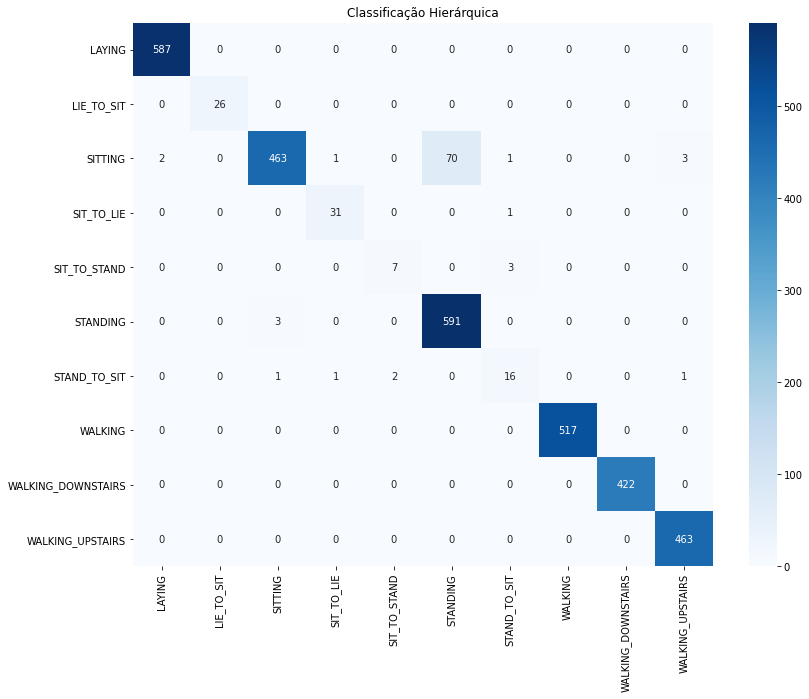

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Hierárquica')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)
